In [1]:
# Import dependencies

import pandas as pd
import petpy as pt

In [2]:
# Import data previously obtained from API call

pet_data = pd.read_csv('Resources/data_import_test.csv')
pet_data.head()

,id,organization_id,url,type,species,age,gender,size,coat,tags,...,contact.address.address1,contact.address.address2,contact.address.city,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id.1,primary_photo_cropped
0,55454849,MN330,https://www.petfinder.com/dog/mork-55454849/mn...,Dog,Dog,Baby,Male,Large,NaN,[],...,PO Box 29461,NaN,Brooklyn Center,MN,55429,US,55454849,dog,mn330,NaN
1,55454847,MN330,https://www.petfinder.com/dog/jessie-55454847/...,Dog,Dog,Adult,Male,Large,NaN,[],...,PO Box 29461,NaN,Brooklyn Center,MN,55429,US,55454847,dog,mn330,NaN
2,55454846,MN330,https://www.petfinder.com/dog/tilin-55454846/m...,Dog,Dog,Young,Male,Medium,NaN,[],...,PO Box 29461,NaN,Brooklyn Center,MN,55429,US,55454846,dog,mn330,NaN
3,55454848,MN330,https://www.petfinder.com/dog/apollo-55454848/...,Dog,Dog,Adult,Male,Medium,NaN,[],...,PO Box 29461,NaN,Brooklyn Center,MN,55429,US,55454848,dog,mn330,NaN
4,55454844,MN330,https://www.petfinder.com/dog/mindy-55454844/m...,Dog,Dog,Baby,Female,Large,NaN,[],...,PO Box 29461,NaN,Brooklyn Center,MN,55429,US,55454844,dog,mn330,NaN


In [3]:
# Determine data types

pet_data.dtypes

id                                int64
organization_id                  object
url                              object
type                             object
species                          object
age                              object
gender                           object
size                             object
coat                             object
tags                             object
name                             object
description                      object
organization_animal_id           object
photos                           object
videos                           object
status                           object
status_changed_at                object
published_at                     object
distance                        float64
breeds.primary                   object
breeds.secondary                 object
breeds.mixed                       bool
breeds.unknown                     bool
colors.primary                   object
colors.secondary                 object


In [176]:
# See NaN values

pet_data.isna().sum(axis=0)

id                                 0
organization_id                    0
url                                0
type                               0
species                            0
age                                0
gender                             0
size                               0
coat                            3909
tags                               0
name                               0
description                       57
organization_animal_id          5519
photos                             0
videos                             0
status                             0
status_changed_at                  0
published_at                       0
distance                           0
breeds.primary                     0
breeds.secondary                4810
breeds.mixed                       0
breeds.unknown                     0
colors.primary                  3692
colors.secondary                5582
colors.tertiary                 7193
attributes.spayed_neutered         0
a

In [177]:
# Create new dataframe with only the desired columns

clean_df = pet_data[['age', 'gender', 'size', 'status_changed_at', 'published_at', 'breeds.primary', 'attributes.spayed_neutered', 'attributes.house_trained', 'attributes.shots_current']].copy()
clean_df.head()

,age,gender,size,status_changed_at,published_at,breeds.primary,attributes.spayed_neutered,attributes.house_trained,attributes.shots_current
0,Baby,Male,Large,2022-05-01T04:44:02+0000,2022-05-01T04:44:02+0000,Labrador Retriever,True,False,True
1,Adult,Male,Large,2022-05-01T04:44:01+0000,2022-05-01T04:44:01+0000,Great Dane,True,True,True
2,Young,Male,Medium,2022-05-01T04:44:01+0000,2022-05-01T04:44:01+0000,Labrador Retriever,True,True,True
3,Adult,Male,Medium,2022-05-01T04:44:01+0000,2022-05-01T04:44:01+0000,American Eskimo Dog,True,True,True
4,Baby,Female,Large,2022-05-01T04:44:00+0000,2022-05-01T04:44:00+0000,Labrador Retriever,True,False,True


In [178]:
# Change status changed at (to adopted) and published at to datetime and subtract to calculate length of stay

clean_df[['status_changed_at', 'published_at']] = clean_df[['status_changed_at', 'published_at']].apply(pd.to_datetime)
clean_df['length_of_stay'] = (clean_df['status_changed_at'] - clean_df['published_at']).dt.days
clean_df.head()

,age,gender,size,status_changed_at,published_at,breeds.primary,attributes.spayed_neutered,attributes.house_trained,attributes.shots_current,length_of_stay
0,Baby,Male,Large,2022-05-01 04:44:02+00:00,2022-05-01 04:44:02+00:00,Labrador Retriever,True,False,True,0
1,Adult,Male,Large,2022-05-01 04:44:01+00:00,2022-05-01 04:44:01+00:00,Great Dane,True,True,True,0
2,Young,Male,Medium,2022-05-01 04:44:01+00:00,2022-05-01 04:44:01+00:00,Labrador Retriever,True,True,True,0
3,Adult,Male,Medium,2022-05-01 04:44:01+00:00,2022-05-01 04:44:01+00:00,American Eskimo Dog,True,True,True,0
4,Baby,Female,Large,2022-05-01 04:44:00+00:00,2022-05-01 04:44:00+00:00,Labrador Retriever,True,False,True,0


In [179]:
# Drop status_changed_at and published_at columns
clean_df = clean_df.drop(['status_changed_at', 'published_at'], axis=1)
clean_df.head()

,age,gender,size,breeds.primary,attributes.spayed_neutered,attributes.house_trained,attributes.shots_current,length_of_stay
0,Baby,Male,Large,Labrador Retriever,True,False,True,0
1,Adult,Male,Large,Great Dane,True,True,True,0
2,Young,Male,Medium,Labrador Retriever,True,True,True,0
3,Adult,Male,Medium,American Eskimo Dog,True,True,True,0
4,Baby,Female,Large,Labrador Retriever,True,False,True,0


In [180]:
# Rename columns

clean_df.columns = ['age', 'gender', 'stature', 'breed', 'spayed_neutered', 'house_trained', 'shots_current', 'duration']
clean_df.head()

,age,gender,stature,breed,spayed_neutered,house_trained,shots_current,duration
0,Baby,Male,Large,Labrador Retriever,True,False,True,0
1,Adult,Male,Large,Great Dane,True,True,True,0
2,Young,Male,Medium,Labrador Retriever,True,True,True,0
3,Adult,Male,Medium,American Eskimo Dog,True,True,True,0
4,Baby,Female,Large,Labrador Retriever,True,False,True,0


In [181]:
# Encode some of the columns

clean_df = pd.get_dummies(clean_df, columns=['age', 'gender', 'stature', 'spayed_neutered', 'house_trained', 'shots_current'])
clean_df.head()

,breed,duration,age_Adult,age_Baby,age_Senior,age_Young,gender_Female,gender_Male,stature_Extra Large,stature_Large,stature_Medium,stature_Small,spayed_neutered_False,spayed_neutered_True,house_trained_False,house_trained_True,shots_current_False,shots_current_True
0,Labrador Retriever,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1
1,Great Dane,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1
2,Labrador Retriever,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1
3,American Eskimo Dog,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1
4,Labrador Retriever,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1


In [182]:
# Convert boolean values to 1/0

#clean_df['attributes.spayed_neutered'] = clean_df['attributes.spayed_neutered'].astype(float)
#clean_df['attributes.house_trained'] = clean_df['attributes.house_trained'].astype(float)
#clean_df['attributes.shots_current'] = clean_df['attributes.shots_current'].astype(float)
#clean_df.head()

In [183]:
# Determine number of breeds in dataset

breed_counts = clean_df.breed.value_counts()
breed_counts

Labrador Retriever              778
Mixed Breed                     615
Shepherd                        546
Pit Bull Terrier                412
Terrier                         403
                               ... 
White German Shepherd             1
Klee Kai                          1
Cane Corso                        1
Petit Basset Griffon Vendeen      1
Belgian Shepherd / Sheepdog       1
Name: breed, Length: 154, dtype: int64

<AxesSubplot:ylabel='Density'>

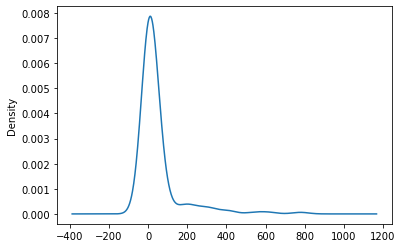

In [184]:
# Visualize the value counts

breed_counts.plot.density()

In [185]:
# Determine which values to replace
replace_breeds = list(breed_counts[breed_counts < 20].index)

# Replace in DataFrame
for breed in replace_breeds:
    clean_df.breed = clean_df.breed.replace(breed,"Other")


# Check to make sure binning was successful
clean_df.breed.value_counts()

Labrador Retriever                     778
Mixed Breed                            615
Shepherd                               546
Other                                  533
Pit Bull Terrier                       412
Terrier                                403
German Shepherd Dog                    325
Chihuahua                              318
Retriever                              309
Australian Cattle Dog / Blue Heeler    264
Beagle                                 262
Boxer                                  228
Border Collie                          201
Australian Shepherd                    200
Hound                                  189
American Staffordshire Terrier         180
Husky                                  171
Great Pyrenees                         105
Shih Tzu                                91
Cattle Dog                              74
Black Labrador Retriever                70
Doberman Pinscher                       70
Spaniel                                 69
Dachshund  

In [186]:
clean_df.head()

,breed,duration,age_Adult,age_Baby,age_Senior,age_Young,gender_Female,gender_Male,stature_Extra Large,stature_Large,stature_Medium,stature_Small,spayed_neutered_False,spayed_neutered_True,house_trained_False,house_trained_True,shots_current_False,shots_current_True
0,Labrador Retriever,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1
1,Great Dane,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1
2,Labrador Retriever,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1
3,Other,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1
4,Labrador Retriever,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1


In [187]:
# Fit the encoder and produce encoded DataFrame of breeds
breed_df = pd.DataFrame(enc.fit_transform(clean_df.breed.values.reshape(-1,1)))

# Rename encoded columns
breed_df.columns = enc.get_feature_names(['Breed'])
breed_df.head()

,Breed_Alaskan Malamute,Breed_American Bulldog,Breed_American Bully,Breed_American Staffordshire Terrier,Breed_Australian Cattle Dog / Blue Heeler,Breed_Australian Shepherd,Breed_Basset Hound,Breed_Beagle,Breed_Black Labrador Retriever,Breed_Black Mouth Cur,...,Breed_Rottweiler,Breed_Schnauzer,Breed_Shepherd,Breed_Shih Tzu,Breed_Siberian Husky,Breed_Spaniel,Breed_Terrier,Breed_Wirehaired Terrier,Breed_Yellow Labrador Retriever,Breed_Yorkshire Terrier
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
# Merge the breed DataFrame with the original DataFrame
encoded_df = pd.merge(clean_df, breed_df,left_index=True,right_index=True).drop("breed",1)
encoded_df

C:\Users\m212193\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,duration,age_Adult,age_Baby,age_Senior,age_Young,gender_Female,gender_Male,stature_Extra Large,stature_Large,stature_Medium,...,Breed_Rottweiler,Breed_Schnauzer,Breed_Shepherd,Breed_Shih Tzu,Breed_Siberian Husky,Breed_Spaniel,Breed_Terrier,Breed_Wirehaired Terrier,Breed_Yellow Labrador Retriever,Breed_Yorkshire Terrier
0,0,0,1,0,0,0,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,0,0,0,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,1,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,0,0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,55,1,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7396,7,1,0,0,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7397,6,1,0,0,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7398,3,1,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [189]:
# Export encoded data to csv file

encoded_df.to_csv('Resources/encoded_data_test.csv', index=False)